<a href="https://colab.research.google.com/github/mohzary/python-deep-learning-f19/blob/master/Lab%202/Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie Reviews Text Classification With CNN** 

---
Dataset: Sentiment Analysis on Movie Reviews | [download](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data)


In [0]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras import layers
from keras.preprocessing.text import Tokenizer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#To upload movie reviews dataset file to google colab
import io
from google.colab import files

%matplotlib inline

In [59]:
# To upload file from local dir to google colab
reviewsTrainFile = files.upload()


Saving train.tsv to train.tsv


In [0]:
# To assign train file content to pandas object 
trainReviews = pd.read_csv(io.StringIO(reviewsTrainFile['train.tsv'].decode('utf-8')), sep='\t')

In [61]:
# To upload test file from local dir to google colab
reviewsTestFile = files.upload()

Saving test.tsv to test.tsv


In [0]:
# To assign test file content to pandas object 
testReviews = pd.read_csv(io.StringIO(reviewsTestFile['test.tsv'].decode('utf-8')), sep='\t')

In [63]:
# To show the first 5 rows in trainig dataset.
trainReviews.head(5)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


# **The sentiment labels are:**


*   0 - negative
*   1 - somewhat negative
*   2 - neutral
*   3 - somewhat positive
*   4 - positive



In [64]:
trainReviews.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [0]:
#To combine negative and somewhat negative rows under one category which is negative, also somewhat positive and positive under positive label:
trainReviews.Sentiment.replace([0,4],[1,3], inplace=True)

In [66]:
trainReviews.Sentiment.value_counts()

2    79582
3    42133
1    34345
Name: Sentiment, dtype: int64

# **The new sentiment labels are:**


*   1 - negative
*   2 - neutral
*   3 - positive



In [67]:
# To show range of data, number of columns, type of features, and feature names  in the training dataset
trainReviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
PhraseId      156060 non-null int64
SentenceId    156060 non-null int64
Phrase        156060 non-null object
Sentiment     156060 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


**To Handle Null Values**

First we check if there is any null values in our training dataset

In [68]:
# To Show number of null values in each column in the trainig dataset:
trainNullValues = pd.DataFrame(trainReviews.isnull().sum().sort_values(ascending=False))
trainNullValues.columns = ['NO# of null values']
trainNullValues.index.name = 'Feature'
print(trainNullValues)

            NO# of null values
Feature                       
Sentiment                    0
Phrase                       0
SentenceId                   0
PhraseId                     0


**There is no null values**

The result shows that we have no null values in the training dataset. So, next step is to assign the Phrase and the sentiment into X and Y varaibles:

In [0]:
#to assign the Phrase and the sentiment into X and Y varaibles:
phrase = trainReviews['Phrase'].values
Y = trainReviews['Sentiment'].values

In [0]:
# To set our model parameters:
vocabulary_Size = 10000
features_Size = 300
batch_size = 250
embedding_dims = 300
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 25

In [0]:
#tokenizing phrase and get the vocabulary


tokenizer = Tokenizer(num_words=vocabulary_Size, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
tokenizer.fit_on_texts(phrase)
X = tokenizer.texts_to_sequences(phrase)
X = sequence.pad_sequences(X, maxlen=features_Size)

In [0]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
labelencoder = LabelEncoder()
integer_encoded = labelencoder.fit_transform(Y)
Y = to_categorical(integer_encoded)

In [0]:
# To split dataset 

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1000)

In [83]:
print(X_train[0].shape)
print(X_train[1111])
print(y_train[11111])

(300,)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0

In [0]:
def reviewsModel():
    model = Sequential()

    model.add(Embedding(vocabulary_Size,embedding_dims, input_length=features_Size))

    model.add(Dropout(0.2))

    model.add(Conv1D(filters, kernel_size, padding='valid', activation='relu', strides=1))

    model.add(GlobalMaxPooling1D())

    model.add(Dense(hidden_dims))

    model.add(Dropout(0.2))

    model.add(Activation('relu'))

    model.add(Dense(3, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [89]:
# To Set up TensorBoard to visualize our model loss,acc, and graph
from keras.callbacks import TensorBoard
tbCallBack= TensorBoard(log_dir='./lab2Q4', histogram_freq=0,write_graph=True, write_images=True) 
model = reviewsModel()

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=5, validation_data=(X_test, y_test), callbacks=[tbCallBack])

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 300, 300)          3000000   
_________________________________________________________________
dropout_13 (Dropout)         (None, 300, 300)          0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 298, 250)          225250    
_________________________________________________________________
global_max_pooling1d_7 (Glob (None, 250)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 250)               62750     
_________________________________________________________________
dropout_14 (Dropout)         (None, 250)               0         
_________________________________________________________________
activation_7 (Activation)    (None, 250)             

In [90]:
#The evaluation satge to get the final accuraccy result of our model
score,acc = model.evaluate(X_test,y_test,verbose=2,batch_size=batch_size)
print("Loss Score: %.2f" % (score))
print("Accuracy: %.2f%%" % (acc*100))
print(model.metrics_names)

Loss Score: 0.69
Accuracy: 74.69%
['loss', 'acc']


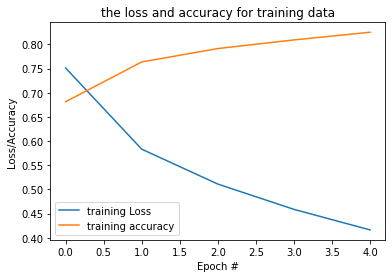

In [92]:
#plot the loss and accuracy for both training data 
plt.figure()
plt.plot(np.arange(0, 5), history.history["loss"], label="training Loss")
plt.plot(np.arange(0, 5), history.history["acc"], label="training accuracy")
plt.title("the loss and accuracy for training data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

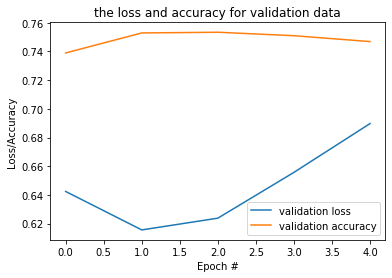

In [93]:
#plot the loss and accuracy for both training data and validation data. 
plt.figure()
plt.plot(np.arange(0, 5), history.history["val_loss"], label="validation loss")
plt.plot(np.arange(0, 5), history.history["val_acc"], label="validation accuracy")

plt.title("the loss and accuracy for validation data")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")

In [0]:
# to Save our model to use it leater to predict new sentences

model.save('movie-model.h5')


In [0]:
#To Load our movie model 
from keras.models import load_model 
savedmodel = load_model('movie-model.h5')

In [127]:
trainReviews.head(30)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [151]:
newSentence = [trainReviews['Phrase'][2030]]
print(newSentence)
tokenizer = Tokenizer(num_words=vocabulary_Size, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ')
tokenizer.fit_on_texts(newSentence)
newPrediction = tokenizer.texts_to_sequences(newSentence)
newPrediction = sequence.pad_sequences(newPrediction, maxlen=features_Size)


# 1 - negative
# 2 - neutral
# 3 - positive


predictionResult = savedmodel.predict_classes(newPrediction)
modelClass = ['Negative','Neutral','positive']
print("Predicted Class is: ", (predictionResult))



['the wrong character']
Predicted Class is:  [1]
